In [1]:
import numpy as np
import pandas as pd

In [2]:
netflix_df = pd.read_csv("data/netflix.csv")
netflix_df

,title,genre,release,runtime,score,language
0,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
1,Leyla Everlasting,Comedy,2020-12-04,112,3.7,Turkish
2,Sardar Ka Grandson,Comedy,2021-05-18,139,4.1,Hindi
3,Searching for Sheela,Documentary,2021-04-22,58,4.1,English
4,The Call,Drama,2020-11-27,112,4.1,Korean
...,...,...,...,...,...,...
225,Seaspiracy,Documentary,2021-03-24,89,8.2,English
226,The Three Deaths of Marisela Escobedo,Documentary,2020-10-14,109,8.2,Spanish
227,Dancing with the Birds,Documentary,2019-10-23,51,8.3,English
228,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [3]:
netflix_df.groupby('genre')

In [4]:
netflix_df.groupby('genre').size().reset_index()

,genre,0
0,Comedy,33
1,Documentary,80
2,Drama,59
3,Romantic comedy,27
4,Thriller,31


In [5]:
netflix_df.groupby('genre').count()

,title,release,runtime,score,language
genre,,,,,
Comedy,33,33,33,33,33
Documentary,80,80,80,80,80
Drama,59,59,59,59,59
Romantic comedy,27,27,27,27,27
Thriller,31,31,31,31,31


In [6]:
netflix_df.groupby('genre')['score'].mean().round(2)

genre
Comedy             5.52
Documentary        6.94
Drama              6.27
Romantic comedy    5.72
Thriller           5.69
Name: score, dtype: float64

In [7]:
clothes_df = pd.DataFrame({
        'size': ['L', 'S', 'XS', 'L', 'S', 'XL', 'L', 'S', 'M', 'XS',
             'M', 'M', 'XS', 'L', 'XL', 'XS', 'M', 'S', 'L', 'XL'],
    'sales': [130, 200, 120, 120, 140, 160, 190, 90, 110, 100,
              150, 180, 100, 200, 80, 140, 150, 90, 80, 130]
})

clothes_df

,size,sales
0,L,130
1,S,200
2,XS,120
3,L,120
4,S,140
5,XL,160
6,L,190
7,S,90
8,M,110
9,XS,100


In [8]:
clothes_df['size'] = pd.Categorical(clothes_df['size'], ordered=True, categories=['XS', 'S', 'M', 'L', 'XL'])

In [9]:
clothes_df.sort_values(by='size')

,size,sales
9,XS,100
2,XS,120
15,XS,140
12,XS,100
1,S,200
17,S,90
4,S,140
7,S,90
16,M,150
8,M,110


In [10]:
clothes_df.groupby('size').mean()

/var/folders/j6/vc6mjcjd2yqghkgbv6fptp0r0000gn/T/ipykernel_12016/1802616171.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  clothes_df.groupby('size').mean()


,sales
size,
XS,115.000000
S,130.000000
M,147.500000
L,144.000000
XL,123.333333


In [11]:
import seaborn as sns

/var/folders/j6/vc6mjcjd2yqghkgbv6fptp0r0000gn/T/ipykernel_12016/3295622032.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=clothes_df, x='size', y='sales', palette='muted')


<Axes: xlabel='size', ylabel='sales'>

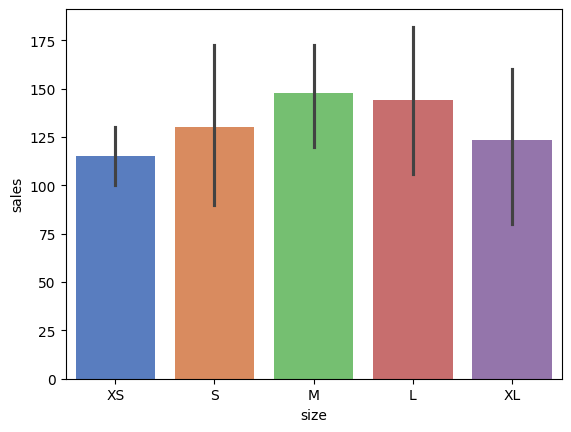

In [12]:
sns.barplot(data=clothes_df, x='size', y='sales', palette='muted')

In [13]:
netflix_df['year'] = pd.to_datetime(netflix_df['release']).dt.year

In [14]:
netflix_df.groupby(['year', 'genre'], observed=False).mean(numeric_only=True)

runtime     score
year genre                                
2019 Comedy            84.250000  5.625000
     Documentary       82.033333  6.920000
     Drama            107.857143  6.335714
     Romantic comedy   92.714286  5.871429
     Thriller         105.428571  5.842857
2020 Comedy           100.857143  5.571429
     Documentary       82.611111  7.177778
     Drama            103.000000  6.055556
     Romantic comedy  105.187500  5.687500
     Thriller         106.944444  5.666667
2021 Comedy           104.428571  5.228571
     Documentary       76.142857  6.378571
     Drama            110.500000  6.533333
     Romantic comedy  102.500000  5.600000
     Thriller         107.833333  5.566667

In [15]:
netflix_df.groupby(['year', 'genre'], observed=False).mean(numeric_only=True).loc[2020, ]

,runtime,score
genre,,
Comedy,100.857143,5.571429
Documentary,82.611111,7.177778
Drama,103.000000,6.055556
Romantic comedy,105.187500,5.687500
Thriller,106.944444,5.666667


In [16]:
netflix_df.groupby(['year', 'genre'], observed=False).mean(numeric_only=True).loc[(2020, ['Drama', 'Comedy']), :]

runtime     score
year genre                       
2020 Drama   103.000000  6.055556
     Comedy  100.857143  5.571429

In [17]:
netflix_df.groupby(['year', 'genre'], observed=False).mean(numeric_only=True).loc[([2019, 2020, 2021], 'Drama'), :]

,,runtime,score
year,genre,,
2019,Drama,107.857143,6.335714
2020,Drama,103.000000,6.055556
2021,Drama,110.500000,6.533333


In [18]:
netflix_df.groupby('genre')['score'].agg('min')

genre
Comedy             3.7
Documentary        4.1
Drama              4.1
Romantic comedy    4.1
Thriller           2.6
Name: score, dtype: float64

In [19]:
netflix_df.groupby('genre')['score'].agg(['min', 'max', 'mean'])

,min,max,mean
genre,,,
Comedy,3.7,7.2,5.518182
Documentary,4.1,9.0,6.941250
Drama,4.1,7.9,6.267797
Romantic comedy,4.1,6.8,5.722222
Thriller,2.6,7.3,5.687097


In [20]:
netflix_df.groupby('genre').agg({'score': 'mean', 'runtime': ['min', 'max']})

score runtime     
                     mean     min  max
genre                                 
Comedy           5.518182      30  139
Documentary      6.941250      16  144
Drama            6.267797      17  151
Romantic comedy  5.722222      85  131
Thriller         5.687097      81  149

In [21]:
pd.pivot_table(netflix_df, values='score', index='year', columns='genre', aggfunc='max')

genre,Comedy,Documentary,Drama,Romantic comedy,Thriller
year,,,,,
2019,6.9,8.3,7.9,6.8,6.6
2020,7.2,9.0,7.8,6.4,7.3
2021,6.3,8.2,7.2,6.6,6.5


In [22]:
pd.pivot_table(netflix_df, values=['score', 'runtime'], index='year', columns='genre', aggfunc='max')

runtime                                             score              \
genre  Comedy Documentary Drama Romantic comedy Thriller Comedy Documentary   
year                                                                          
2019      104         144   151             102      130    6.9         8.3   
2020      124         109   151             131      149    7.2         9.0   
2021      139         112   142             109      142    6.3         8.2   

                                      
genre Drama Romantic comedy Thriller  
year                                  
2019    7.9             6.8      6.6  
2020    7.8             6.4      7.3  
2021    7.2             6.6      6.5

In [23]:
order_df = pd.read_csv("data/order.csv", parse_dates=['order_time', 'shipping_time'])
order_df = order_df.dropna()
order_df

,order_time,category,product_name,price,quantity,sales,days_for_shipping(expected),shipping_time
0,2015-01-01 04:54:00,Cleats,Perfect Fitness Perfect Rip Deck,59.99,3,179.97,6,2015-01-07 19:07:00
2,2015-01-01 02:27:00,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,49.98,4,199.92,6,2015-01-05 13:15:00
3,2015-01-01 19:58:00,Golf Gloves,Clicgear 8.0 Shoe Brush,9.99,2,19.98,6,2015-01-05 12:08:00
4,2015-01-01 03:51:00,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,299.98,1,299.98,6,2015-01-04 20:06:00
5,2015-01-01 22:04:00,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.00,3,150.00,3,2015-01-03 19:47:00
...,...,...,...,...,...,...,...,...
18045,2018-01-31 10:20:00,Women's Clothing,Summer dresses,215.82,1,215.82,4,2018-02-02 13:53:00
18046,2018-01-31 21:53:00,Women's Clothing,Summer dresses,215.82,1,215.82,3,2018-02-02 18:50:00
18047,2018-01-31 17:20:00,Women's Clothing,Summer dresses,215.82,1,215.82,6,2018-02-02 10:16:00
18048,2018-01-31 12:26:00,Women's Clothing,Summer dresses,215.82,1,215.82,6,2018-02-03 18:58:00


In [24]:
order_df = order_df.set_index('order_time')
order_df

,category,product_name,price,quantity,sales,days_for_shipping(expected),shipping_time
order_time,,,,,,,
2015-01-01 04:54:00,Cleats,Perfect Fitness Perfect Rip Deck,59.99,3,179.97,6,2015-01-07 19:07:00
2015-01-01 02:27:00,Indoor/Outdoor Games,O'Brien Men's Neoprene Life Vest,49.98,4,199.92,6,2015-01-05 13:15:00
2015-01-01 19:58:00,Golf Gloves,Clicgear 8.0 Shoe Brush,9.99,2,19.98,6,2015-01-05 12:08:00
2015-01-01 03:51:00,Camping & Hiking,Diamondback Women's Serene Classic Comfort Bi,299.98,1,299.98,6,2015-01-04 20:06:00
2015-01-01 22:04:00,Women's Apparel,Nike Men's Dri-FIT Victory Golf Polo,50.00,3,150.00,3,2015-01-03 19:47:00
...,...,...,...,...,...,...,...
2018-01-31 10:20:00,Women's Clothing,Summer dresses,215.82,1,215.82,4,2018-02-02 13:53:00
2018-01-31 21:53:00,Women's Clothing,Summer dresses,215.82,1,215.82,3,2018-02-02 18:50:00
2018-01-31 17:20:00,Women's Clothing,Summer dresses,215.82,1,215.82,6,2018-02-02 10:16:00


In [25]:
order_df.resample('D').sum(numeric_only=True)

,price,quantity,sales,days_for_shipping(expected)
order_time,,,,
2015-01-01,2429.79,33,3219.62,82
2015-01-02,1889.80,34,2829.55,78
2015-01-03,2379.76,45,3859.43,90
2015-01-04,1804.82,42,3129.60,84
2015-01-05,2282.82,30,2985.72,80
...,...,...,...,...
2018-01-27,1510.74,7,1510.74,38
2018-01-28,1510.74,7,1510.74,29
2018-01-29,1510.74,7,1510.74,40


In [26]:
order_df.resample('ME').sum(numeric_only=True)

,price,quantity,sales,days_for_shipping(expected)
order_time,,,,
2015-01-31,69256.79,1180,104624.20,2615
2015-02-28,59156.44,1037,88549.87,2276
2015-03-31,73245.51,1183,108959.04,2611
2015-04-30,68007.98,1089,98467.21,2551
2015-05-31,68640.97,1172,103706.92,2646
2015-06-30,69010.02,1098,100028.38,2536
2015-07-31,74171.81,1155,107817.04,2608
2015-08-31,65600.13,1143,99348.51,2578
2015-09-30,67185.93,1120,100843.76,2561


In [27]:
order_df.resample('YE').sum(numeric_only=True)

,price,quantity,sales,days_for_shipping(expected)
order_time,,,,
2015-12-31,823262.88,13784,1232529.88,30802
2016-12-31,826870.17,13617,1229005.71,30403
2017-12-31,877373.97,10469,1173778.74,26063
2018-12-31,34428.66,217,34428.66,1075


In [28]:
order_df.resample('YE')['price', 'quantity'].sum(numeric_only=True)

,price,quantity
order_time,,
2015-12-31,823262.88,13784
2016-12-31,826870.17,13617
2017-12-31,877373.97,10469
2018-12-31,34428.66,217


In [29]:
order_df.resample('YE')[['price', 'quantity']].sum(numeric_only=True)

,price,quantity
order_time,,
2015-12-31,823262.88,13784
2016-12-31,826870.17,13617
2017-12-31,877373.97,10469
2018-12-31,34428.66,217


In [39]:
cols = [col for col in netflix_df.columns if netflix_df[col].dtype == 'O']
cols

['title', 'genre', 'release', 'language']

In [36]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   title     230 non-null    object 
 1   genre     230 non-null    object 
 2   release   230 non-null    object 
 3   runtime   230 non-null    int64  
 4   score     230 non-null    float64
 5   language  230 non-null    object 
 6   year      230 non-null    int32  
dtypes: float64(1), int32(1), int64(1), object(4)
memory usage: 11.8+ KB


AttributeError: 'DataFrame' object has no attribute 'unique'